# Install required libraries and [Contourf and cartopy issues resolved](https://linuxtut.com/en/8f0d69169dc6ab753e08/)


In [1]:
!pip install xarray
!pip install cartopy

!grep '^deb ' /etc/apt/sources.list | \
  sed 's/^deb /deb-src /g' | \
  tee /etc/apt/sources.list.d/deb-src.list
!apt-get -qq update

!grep '^deb ' /etc/apt/sources.list | \
  sed 's/^deb /deb-src /g' | \
  tee /etc/apt/sources.list.d/deb-src.list
!apt-get update

!apt-get -qq build-dep python3-cartopy
!apt-get -qq remove python-shapely python3-shapely

!pip install --no-binary shapely shapely --force
!pip install --no-binary cartopy cartopy==0.19.0

!pip list | grep Shapely

     |████████████████████████████████| 10.8 MB 18.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 33.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 49.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 12.1 MB 41.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 44 kB 1.8 MB/s 
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp37-cp37m-linux_x86_64.whl size=12516284 sha256=0d3969a7b444f4b085a27f6fd79668a2e66f470912e44ba2ef0ea97f8022513b
  Stored in directory: /root/.cache/pip/wheels/98/01/f7/bd10aeb96fe4b518cde5f7c4f5e12c7202f85b7353a5017847
Successfully built cartopy
deb-src 

## WEEK 7 ASSIGNMENT

### In this assignment, you will continue exploring the data collected on earthquakes of magnitude > 4.5 that occurred globally from 1 Feb 2021 through 1 Feb 2022 that you downloaded and began analyzing last week!


### HELPFUL REMINDER FOR THIS ASSIGNMENT
- remember: dataframe['col name'] accesses a column

In [2]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.image import imread
import seaborn as sb
import numpy as np
import urllib
import warnings
warnings.filterwarnings('ignore')

####  Read in data into a Pandas DataFrame called 'earth' - you can copy & paste from last week
- allow dataframe index to default to creating its own - the time strings are messy and you haven't learned yet how to deal with them!
<br><br>
- we are only interested in the following variables (columns), so either only read in these variables, or read in all variables and subsequently drop the other columns
   - time
   - latitude
   - longitude
   - depth
   - mag (magnitude of earthquake - strength)
   - place

In [3]:
# Read in the data
earth = pd.read_csv('query.csv')
# retain only these columns time, latitude, longitude, depth, mag, place
earth = earth[['time', 'latitude', 'longitude', 'depth', 'mag', 'place']]
earth.head()

,time,latitude,longitude,depth,mag,place
0,2022-01-31T22:18:32.343Z,-20.8636,-175.3691,10.00,4.6,Tonga
1,2022-01-31T22:01:27.405Z,31.9193,104.3384,10.00,4.6,"39 km WNW of Jiangyou, China"
2,2022-01-31T21:36:17.102Z,-29.8948,-71.9834,9.43,4.5,"62 km W of Coquimbo, Chile"
3,2022-01-31T20:07:12.636Z,-20.5450,-175.3251,10.00,4.7,"67 km N of Nuku‘alofa, Tonga"
4,2022-01-31T19:18:23.415Z,-30.0451,-177.5443,20.72,4.8,"Kermadec Islands, New Zealand"


#### (1)  What month and day did the strongest earthquake occur, and in what country?
- You do NOT have to parse the date string, or the place string... for now, you'll just work with the full strings 
- FYI, how to (manually) read date string: year-month-dayTtime

In [4]:
# What month and day did the strongest earthquake occur, and in what country?
earth_strong_mag_id = earth['mag'].idxmax()
print(f"The id of the strongest earthquake is {earth_strong_mag_id}")
# get the time of the earthquake with the strongest magnitude
earth_strong_mag_time = earth['time'][earth_strong_mag_id]
print(f"The time of the strongest earthquake is {earth_strong_mag_time}")
# get the month and day from earth_strong_mag_time, which is year-month-dayTtime
earth_strong_mag_time_split = earth_strong_mag_time.split('T')

earth_strong_mag_month = earth_strong_mag_time_split[0].split('-')[1]
earth_strong_mag_day = earth_strong_mag_time_split[0].split('-')[2]

print(f"The month of the strongest earthquake is {earth_strong_mag_month}")
print(f"The day of the strongest earthquake is {earth_strong_mag_day}")
# get the country of the earthquake with the strongest magnitude
earth_strong_mag_place = earth['place'][earth_strong_mag_id]
print(f"The place of the strongest earthquake is {earth_strong_mag_place}")

# the country is the last part of the place
earth_strong_mag_country = earth_strong_mag_place.split(',')[-1]
print(f"The country of the strongest earthquake is {earth_strong_mag_country}")

The id of the strongest earthquake is 4738
The time of the strongest earthquake is 2021-07-29T06:15:49.188Z
The month of the strongest earthquake is 07
The day of the strongest earthquake is 29
The place of the strongest earthquake is 99 km SE of Perryville, Alaska
The country of the strongest earthquake is  Alaska


#### (2) How many earthquakes occur with magnitude greater than 6?

In [5]:
# earthquakes with 'mag' greater than 6
earth_strong_mag_gt6 = earth[earth['mag'] > 6]
# count of earthquakes with 'mag' greater than 6
print(f"The number of earthquakes with 'mag' greater than 6 is {earth_strong_mag_gt6.shape[0]}")



The number of earthquakes with 'mag' greater than 6 is 124


#### (3) What is the average depth of earthquakes with magnitude greater than 6?

In [6]:
# average depth of earthquakes with 'mag' greater than 6
earth_strong_mag_gt6_depth = earth_strong_mag_gt6['depth'].mean()
print(f"The average depth of earthquakes with 'mag' greater than 6 is {earth_strong_mag_gt6_depth}")

The average depth of earthquakes with 'mag' greater than 6 is 62.61975806451612


#### (4) What percent of all earthquakes with magnitude greater than 6 occur at a depth of less than 10 km?
- you can break this down into discrete steps over multiple lines of code if you'd like
- but NO HARDWIRING regardless of how you do this!

In [7]:
# percentage of earthquakes with 'mag' greater than 6 that occur at a depth of less than 10 km
earth_strong_mag_gt6_depth_lt10 = earth_strong_mag_gt6[earth_strong_mag_gt6['depth'] < 10].shape[0] / earth_strong_mag_gt6.shape[0]
# print upto two decimal places
print(f"The percentage of earthquakes with 'mag' greater than 6 that occur at a depth of less than 10 km is {earth_strong_mag_gt6_depth_lt10:.2%}")


The percentage of earthquakes with 'mag' greater than 6 that occur at a depth of less than 10 km is 8.06%


#### (5) Create a map that has a marker for the (longitude, latitude) location of each earthquake in this dataset in a color of your choice.
- One way to do this:  create your map axes (your geoaxes)
  - Look at how we did this in our 2D plotting, Part II lesson 
- Then create scatter plot using the map axes
<br><br>

*Notes*
- Please include coastlines, gridlines
- Choose a projection that is not PlateCarree - one that seems would work well with plotting earthquake locations (not a trick question - take a look at https://scitools.org.uk/cartopy/docs/latest/crs/projections.html for your preferred choice)
  - Remember projection is what you're plotting data on, transform is coordinates your data is in: https://scitools.org.uk/cartopy/docs/latest/tutorials/understanding_transform.html - recent lesson 
  - Your transform should be ccrs.PlateCarree() still - this will go in your call to the scatterplot via the transform option
<br><br>
- **CHALLENGED, UNGRADED**:  color-code markers by magnitude and/or size in a way that really offsets the more significant earthquakes from the many, many weaker earthquakes (we'll colorcode by two groups of magnitudes in the next question, but I'm asking for a range of color over all magnitudes, if that makes sense)

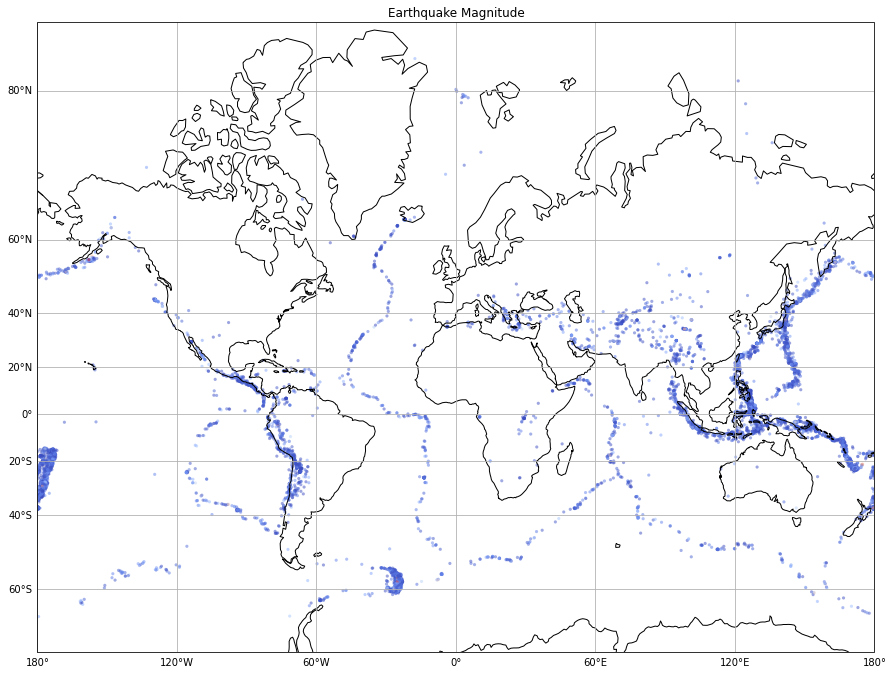

In [8]:
# Create a map that has a marker for the (longitude, latitude) location of each earthquake in this dataset in a color of your choice.
lat = earth['latitude'].values
lon = earth['longitude'].values
mag = earth['mag'].values

# create a color map
cmap=plt.get_cmap('coolwarm')
# use mercator projection
proj = ccrs.Mercator()

# axes 
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(projection=proj))

# add coastlines
ax.coastlines()
# Draw and modify gridlines 
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
# Then create scatter plot using the map axes. Color code the markers by magnitude in a way that offsets the more significant earthquakes from the many weaker earthquakes 
# (i.e. the more significant earthquakes should be plotted with a larger marker).
# use the colormap to color the markers
ax.scatter(lon, lat, c=mag, cmap=cmap, s=10, marker='o', transform=ccrs.PlateCarree(), alpha=0.5, edgecolors='none')
# set x and y labels
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.title('Earthquake Magnitude')

plt.show()



#### (6) Discuss, in a sentence or two, what you notice about any patterns in earthquakes in your map in (5)

* Most of the earthquakes have occured near the coasts of the differnet continents.
* We can also see some earthquakes near Himalyan regions. 
* Earthquakes with higher magnitudes have occured in the east. 
* The pattern of the earthquakes have occured in such a way that their outline matches with the outline of the continents. We could infer the tectonic plates.

#### (7) Make the same map as in (5), but instead, plot earthquakes with magnitude greater than 6 a different color than earthquakes with magnitude less than or equal to 6, and a different size (stronger earthquakes = larger markers)
- experiment with including a legend!
- you'll specify the labels in each call to scatter using the label argument
- and then call the legend (ax.legend) after each call to ax.scatter

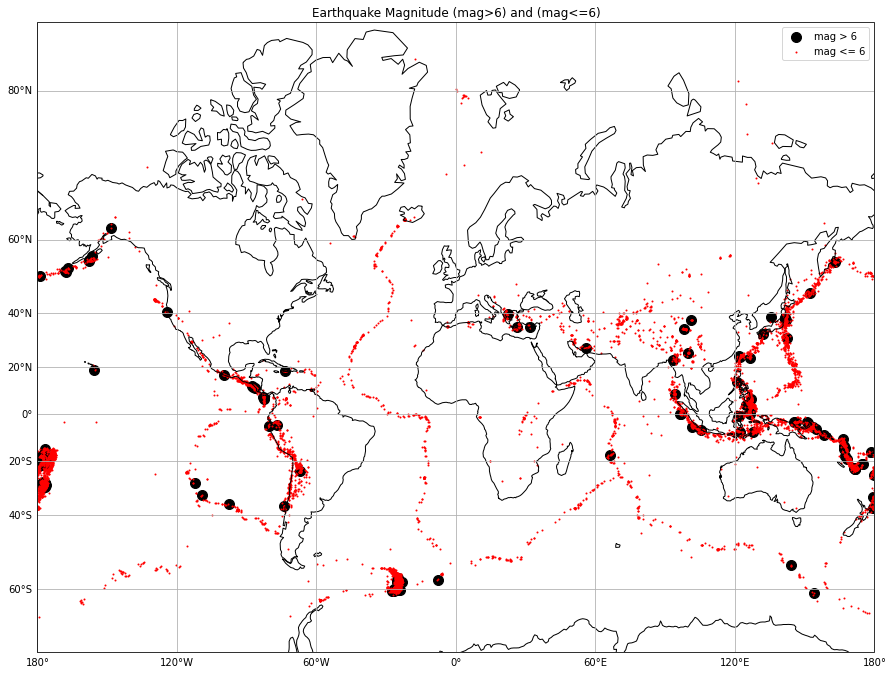

In [9]:
# Create a map that has a marker for the (longitude, latitude) location of each earthquake in this dataset in a color of your choice.
lat = earth['latitude'].values
lon = earth['longitude'].values
mag = earth['mag'].values
# mag > 6
mag_gt6 = earth[earth['mag'] > 6]
# mag <= 6
mag_lt6 = earth[earth['mag'] <= 6]

# cmap for mag > 6
cmap_gt6 = sb.diverging_palette(220, 20, s=99, l=60, as_cmap=True)
# cmap for mag <= 6
cmap_lt6 = sb.diverging_palette(20, 220, s=99, l=60, as_cmap=True)

# use mercator projection
proj = ccrs.Mercator()

# axes 
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(projection=proj))

# add coastlines
ax.coastlines()

# Draw and modify gridlines 
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Make the same map as in (5), but instead, plot earthquakes with magnitude greater than 6 a different color than earthquakes with magnitude less than or equal to 6, and a different size (stronger earthquakes = larger markers)
# use the colormap to color the markers
# add a legend to the map
# if mag >6, plot its scatter plot with a larger marker
# if mag <=6, plot its scatter plot with a smaller marker
# get lat and lon of mag_gt6
mag_gt6_lat = mag_gt6['latitude'].values
mag_gt6_lon = mag_gt6['longitude'].values
# get lat and lon of mag_lt6
mag_lt6_lat = mag_lt6['latitude'].values
mag_lt6_lon = mag_lt6['longitude'].values

# plot scatter plot of mag_gt6 with a larger marker with a label with color 'black'
ax.scatter(mag_gt6_lon, mag_gt6_lat, cmap=cmap_gt6, s=100, marker='o', transform=ccrs.PlateCarree(), label='mag > 6', c='black')
# plot scatter plot of mag_lt6 with a smaller marker with color 'red'
ax.scatter(mag_lt6_lon, mag_lt6_lat, cmap=cmap_lt6, s=1, marker='o', transform=ccrs.PlateCarree(), label='mag <= 6', c = 'red')
# set x and y labels
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.title('Earthquake Magnitude (mag>6) and (mag<=6)')
plt.legend()
plt.show()

